In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

Data is taken from https://github.com/washingtonpost/data-police-shootings

See accompanying Washington Post article here: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

Each row has the following variables:

`id`: a unique identifier for each victim

`name`: the name of the victim

`date`: the date of the fatal shooting in YYYY-MM-DD format

`manner_of_death`:
* shot
* shot and Tasered

`armed`: indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
* undetermined: it is not known whether or not the victim had a weapon
* unknown: the victim was armed, but it is not known what the object was
* unarmed: the victim was not armed

`age`: the age of the victim

`gender`: the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
* M: Male
* F: Female
* None: unknown

`race`:
* W: White, non-Hispanic
* B: Black, non-Hispanic
* A: Asian
* N: Native American
* H: Hispanic
* O: Other
* None: unknown

`city`: the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.

`state`: two-letter postal code abbreviation

`signs of mental illness`: News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

`threat_level`: The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

`flee`: News reports have indicated the victim was moving away from officers
* Foot
* Car
* Not fleeing
The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.

`body_camera`: News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

`latitude` and `longitude`: the location of the shooting expressed as WGS84 coordinates, geocoded from addresses. The coordinates are rounded to 3 decimal places, meaning they have a precision of about 80-100 meters within the contiguous U.S.

`is_geocoding_exact`: reflects the accuracy of the coordinates. true means that the coordinates are for the location of the shooting (within approximately 100 meters), while false means that coordinates are for the centroid of a larger region, such as the city or county where the shooting happened.

In [2]:
df = pd.read_csv('data/fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Things to look at:
    
Washington Post recreation:
* Number of shootings vs. months (overlay curves for each year)
* Rate of police killings compared to fraction of the population
* Victims by age
* Victims by gender
* Shooting location (overlaid on map of the US)

**TO DO: Import a dataframe with population of each US state and race (census)**

Other things to try:
* Splitting things by race or gender

In [3]:
# Convert the date to datetime:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))

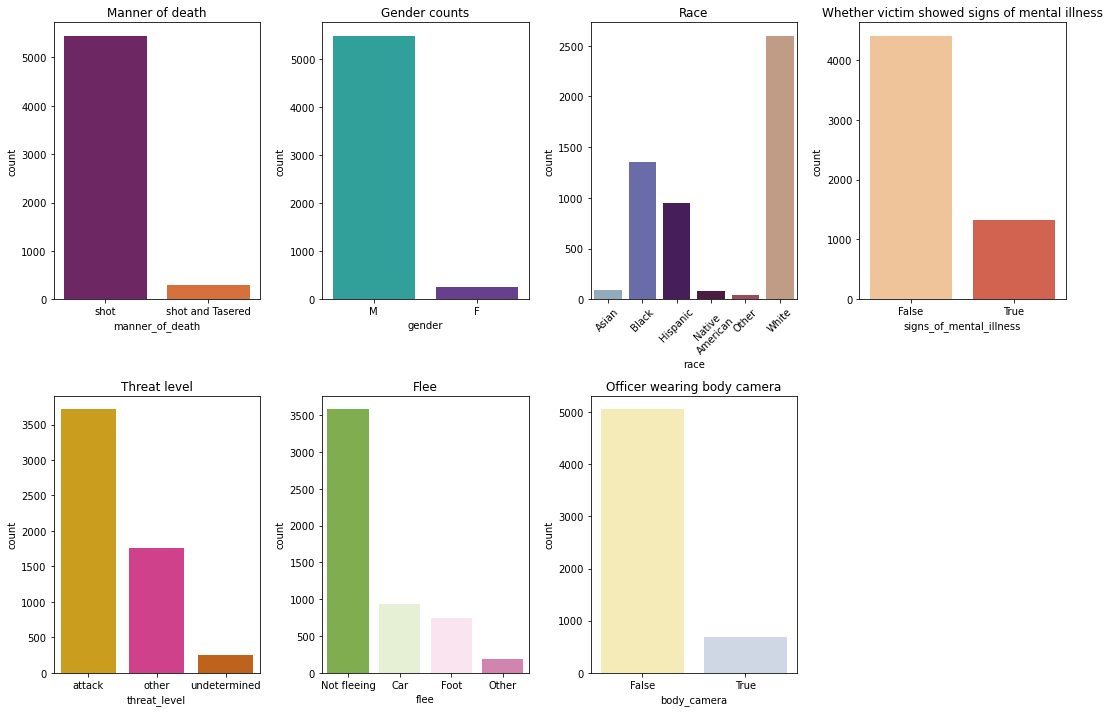

In [17]:
# Plotting based on columns:
# Manner of death, gender, race, mental illness, threat level, flee, body camera:

fig, ax = plt.subplots(2,4, figsize=(15,10))
ax = ax.flatten()

# Manner of death:
sns.countplot(data=df, x='manner_of_death', ax=ax[0], palette='inferno')
ax[0].set_title('Manner of death')

# Gender:
sns.countplot(data=df, x='gender', ax=ax[1], palette=['lightseagreen', 'rebeccapurple'])
ax[1].set_title('Gender counts')

# Race:
sns.countplot(data=df, x=df['race'].sort_values(ascending=True), ax=ax[2], palette='twilight')
races = ['Asian', 'Black', 'Hispanic', 'Native\nAmerican', 'Other', 'White']
ax[2].set_title('Race')
ax[2].set_xticklabels(labels=races, rotation=45)

# Signs of mental illness:
sns.countplot(data=df, x='signs_of_mental_illness', ax=ax[3], palette='OrRd')
ax[3].set_title('Whether victim showed signs of mental illness')

# Threat level:
sns.countplot(data=df, x='threat_level', ax=ax[4], palette='Dark2_r')
ax[4].set_title('Threat level')

# Flee:
sns.countplot(data=df, x='flee', ax=ax[5], palette='PiYG_r')
ax[5].set_title('Flee')

# Body camera:
sns.countplot(data=df, x='body_camera', ax=ax[6], palette='Pastel2_r')
ax[6].set_title('Officer wearing body camera')

ax[7].set_axis_off()

plt.tight_layout()
plt.show()

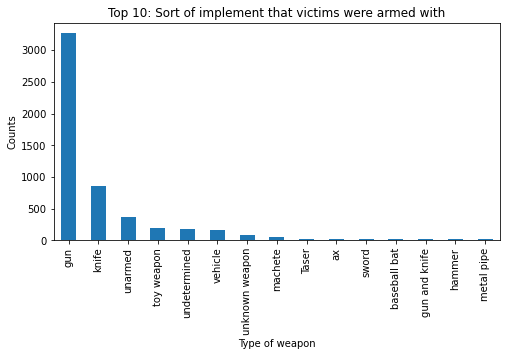

In [5]:
# Armed:
# df.armed.unique()

fig, ax = plt.subplots(figsize=(8,4))
df['armed'].value_counts()[:15].plot(kind='bar')
ax.set_xlabel('Type of weapon')
ax.set_ylabel('Counts')
ax.set_title('Top 10: Sort of implement that victims were armed with')
# sns.countplot(df['armed'], ax=ax)
# ax.set_title('Victim armed with:')
plt.show()

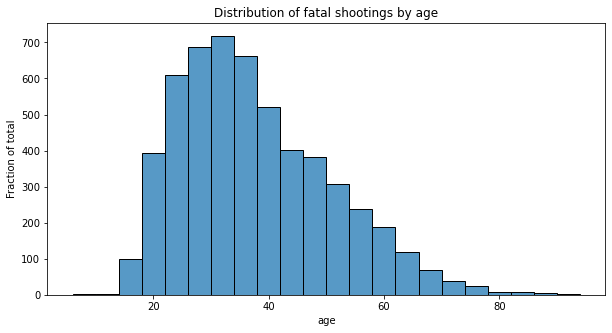

In [6]:
# Age distribution:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df['age'], ax=ax, kde=False, binwidth=4)
ax.set_ylabel('Fraction of total')
ax.set_title('Distribution of fatal shootings by age')
plt.show()

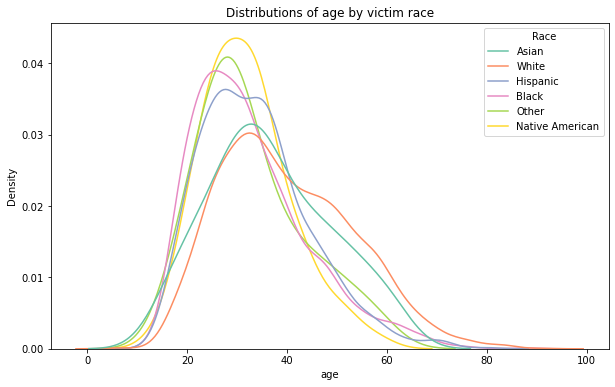

In [7]:
# Plot distribution of age for each race:
races = df.race.unique()
races = [x for x in races if str(x) != 'nan']
# print(races)

fig, ax = plt.subplots(figsize=(10,6))
g = sns.kdeplot(data=df, x='age', hue='race', ax=ax, fill=False, common_norm=False,
            palette='Set2') # crest
ax.set_title('Distributions of age by victim race')

# Get the colors back, just in case:
colors = []
for col in np.arange(0, len(races)):
    colors.append(ax.get_lines()[col].get_c())

legend = ax.legend_
legend.set_title('Race')
for t, l in zip(legend.texts,('Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native American')):
    t.set_text(l)
    
plt.show()

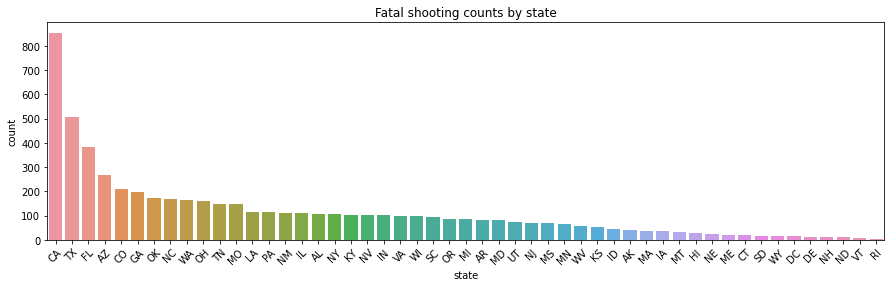

In [8]:
# Plotting deaths by states:
fig, ax = plt.subplots(figsize=(15,4))
order = df['state'].value_counts(ascending=False).index
g = sns.countplot(x='state', data=df, order=order, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Fatal shooting counts by state')

plt.show()

# To do: normalize counts by population

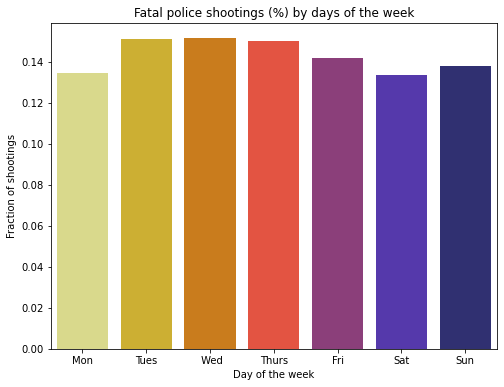

In [10]:
# Get fraction of shootings by day of the week
counts = df['date'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
counts.index = ['Mon', 'Tues',' Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='CMRmap_r')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Fraction of shootings')
ax.set_title('Fatal police shootings (%) by days of the week');

In [11]:
# # Number of shootings by month (recreate WaPo fig. 1):

# fig, ax = plt.subplots()
# # sns.lineplot(data=df, x='date', )
# ax.plot(df.groupby(df['date'].map(lambda x: x.year)))
# plt.show()

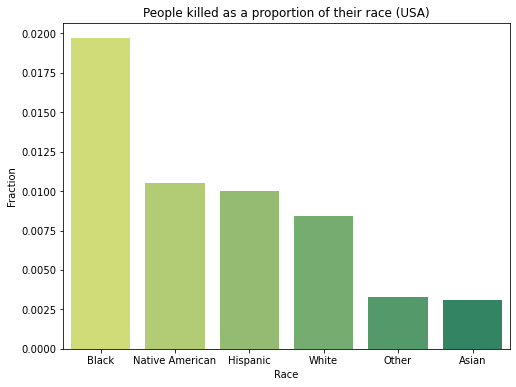

In [12]:
# Get census data and do calculations:
# https://www.census.gov/quickfacts/fact/table/US/PST045219
# Values below are for 2019

# census_dict = {'A': 5.9,  # Asian
#                'W': 60.1, # White
#                'H': 18.5, # Hispanic or Latino
#                'B': 13.4, # Black or African American
#                'O': 2.8,  # Other (two or more races)
#                'N': 1.5   # Native American & Other Pacific Islander,
#                           # American Indian & Alaska Native 
#               } 

# census_df = pd.DataFrame.from_dict(census_dict, orient='index')
# census_df.columns = ['pop_perc']
# census_df.head()

race_list = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']

census_series = pd.Series([60.1, 13.4, 18.5, 5.9, 1.5, 2.8], index=race_list)
race_counts = df.race.value_counts(normalize=True)
race_counts.index = race_list
perc_by_race = race_counts / census_series
perc_by_race = perc_by_race.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=perc_by_race.index, y=perc_by_race.values, palette='summer_r')
ax.set_xlabel('Race')
ax.set_ylabel('Fraction')
ax.set_title('People killed as a proportion of their race (USA)')
plt.show()

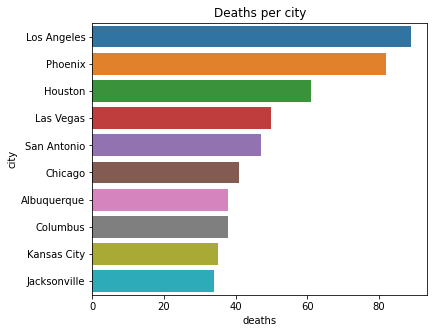

In [13]:
# Group shootings by city, try doing something like

deaths_per_city = df.groupby('city').agg({'city':'count', 'state':'min'})
deaths_per_city.columns = ['deaths', 'state']
deaths_per_city = deaths_per_city.reset_index()
# print(deaths_per_city.head())
# deaths_per_city.head()

deaths_sorted = deaths_per_city.sort_values(by='deaths', ascending=False)
# print(deaths_sorted)

fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(data=deaths_sorted[:10], x='deaths', y='city', ax=ax)
ax.set_title('Deaths per city')
plt.show()

###

# # Plotting deaths by cities:

# fig, ax = plt.subplots()
# ax.barh(df['city'].value_counts()[:10].index, df['city'].value_counts()[:10].values)
# ax.set_xlabel('Counts')
# ax.set_ylabel('City')
# ax.set_title('Top 10 cities with fatal police shootings')

# # fig, ax = plt.subplots(figsize=(15,4))
# # order = df['city'].value_counts(ascending=False).index
# # g = sns.countplot(x='city', data=df, order=order, ax=ax)
# # g.set_xticklabels(g.get_xticklabels(), rotation=45)
# # g.set_title('Fatal shooting counts by state')

# plt.show()

# # To do: normalize counts by population

In [14]:
# To do: plot city deaths relative to city population (i.e., fraction)

In [26]:
# Messing around with plotting on a map:
# see https://www.kaggle.com/edoardo10/fatal-police-shooting-eda-plotly-seaborn for original code
# Still need to mess around with binning things by city and changing the relative radius to indicate # of deaths

import plotly.express as px
import plotly.graph_objects as go

# fig = go.Figure(data=go.Scattergeo(
#         lon = df['longitude'],
#         lat = df['latitude'],
# #         text = df['city'] + ', ' + df['state'] + ': ' + df['cases'].astype(str) ,
#         text = df['city'] + ', ' + df['state'] + ': ' + deaths_per_city.astype(str) ,
#         mode = 'markers',
#         marker = dict(
# #             size = deaths_per_city.apply(lambda x: 4 if x < 5 else x),
#             opacity = 0.8,
#             symbol = 'circle',
#             colorscale = 'bluered_r',
#             reversescale = True,
#             cmin = 1,
# #             color = deaths_per_city,
# #             cmax = deaths_per_city.max(),
#             colorbar_title="Fatal shootings 2015-2020"
#         )))

fig = go.Figure(data=go.Scattergeo(
                lon = df['longitude'],
                lat = df['latitude'],
                mode = 'markers',
                marker = dict(opacity=0.2, symbol='circle', colorscale='bluered_r', reversescale=True, cmin=1)))

fig.update_layout(
        margin={"r":0,"t":30,"l":0,"b":0},
        title = 'Fatal police shooting cases by city, 2015-Present (2020)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = False,
            subunitcolor = "black",
            subunitwidth = 0.5
        )
    )
fig.update_layout(title_x=0.5)
fig.show()